In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('./DATASETS/HeartDisease/Cleavland.csv', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
               "oldpeak", "slope", "ca", "thal", "num"]
df.columns = column_names
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
df.replace('\?', np.nan, regex=True, inplace=True)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [10]:
df['thal'].fillna(method='ffill', inplace=True)

In [11]:
df['ca'].fillna(method='ffill', inplace=True)

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
df = df.astype(float)
df.lt(0).any().any()

False

In [14]:
import matplotlib.pyplot as plt

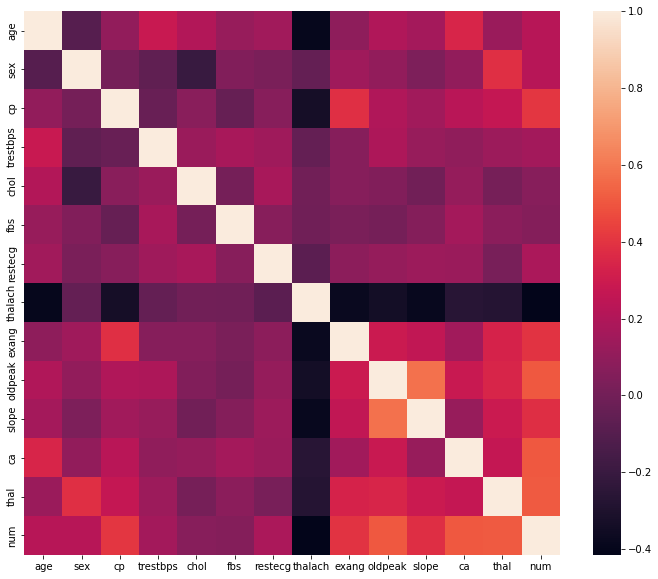

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.show()

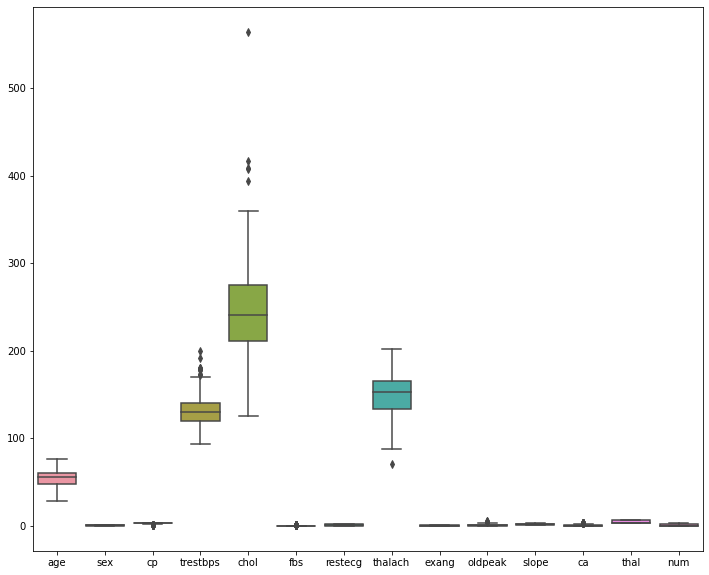

In [16]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df)
plt.show()

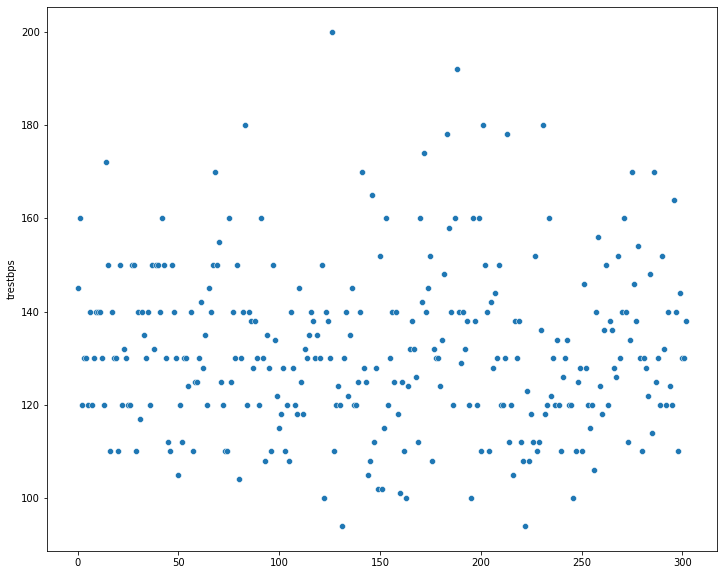

In [17]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df['trestbps'])
plt.show()

In [18]:
# OUTLIERS REMOVING FROM CHOL AND TRESTBPS

In [19]:
percentile25_chol = df['chol'].quantile(0.25)
percentile75_chol = df['chol'].quantile(0.75)

percentile25_trbps = df['trestbps'].quantile(0.25)
percentile75_trbps = df['trestbps'].quantile(0.75)

In [20]:
IQR_chol = percentile75_chol - percentile25_chol
IQR_trbps = percentile75_trbps - percentile25_trbps

In [21]:
lower_bound_chol = percentile25_chol - (1.5 * IQR_chol)
upper_bound_chol = percentile75_chol + (1.5 * IQR_chol)

lower_bound_trbps = percentile25_trbps - (1.5 * IQR_trbps)
upper_bound_trbps = percentile75_trbps + (1.5 * IQR_trbps)

In [22]:
df['chol'] = np.where(
    df['chol'] > upper_bound_chol,
    upper_bound_chol,
    np.where(
        df['chol'] < lower_bound_chol,
        lower_bound_chol,
        df['chol']
    )
)

In [23]:
df['trestbps'] = np.where(
    df['trestbps'] > upper_bound_trbps,
    upper_bound_trbps,
    np.where(
        df['trestbps'] < lower_bound_trbps,
        lower_bound_trbps,
        df['trestbps']
    )
)

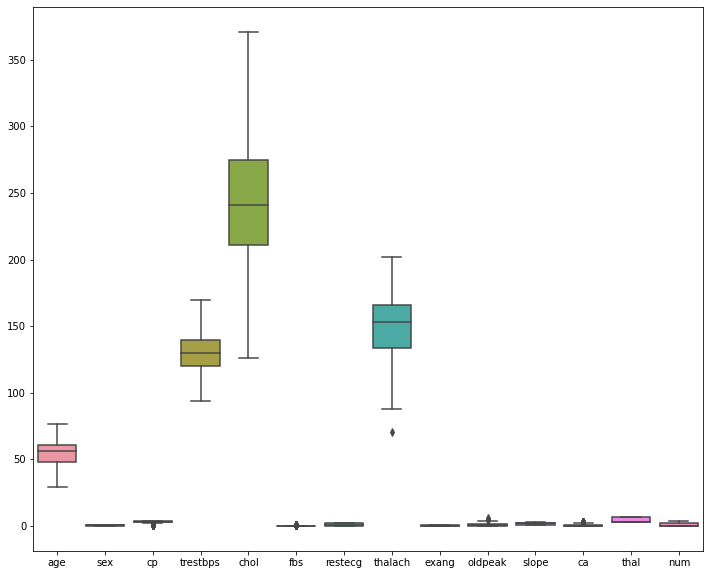

In [24]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df)
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
scaler.fit(df.drop('num', axis=1))

StandardScaler()

In [63]:
X_scaled = scaler.transform(df.drop('num', axis=1))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [64]:
# MODEL BUILDING

In [65]:
y = df['num']

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = knn.predict(X_test)

In [71]:
y_pred

array([0., 2., 0., 0., 1., 2., 4., 1., 0., 0., 0., 0., 0., 1., 2., 0., 0.,
       2., 3., 0., 0., 0., 1., 0., 2., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 3., 2., 0., 0., 0., 0., 0., 3., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0.])

In [72]:
new_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
new_df

,Actual,Predicted
179,0.0,0.0
228,3.0,2.0
111,1.0,0.0
246,2.0,0.0
60,2.0,1.0
...,...,...
22,1.0,0.0
258,0.0,1.0
56,1.0,0.0
242,0.0,0.0


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [74]:
print(accuracy_score(y_test, y_pred))

0.5789473684210527
